# IS 4487 Assignment 9: Customer Segmentation with Clustering

In this assignment, you will:
- Apply unsupervised learning to explore patterns in hotel booking behavior
- Use K-Means and Gaussian Mixture Models (GMM) for customer segmentation
- Evaluate model quality with metrics like Silhouette Score and Davies-Bouldin Index
- Connect clustering to actionable business insights

## Why This Matters

Businesses like hotels and travel platforms (e.g., Airbnb or Expedia) rely on customer segmentation to tailor promotions, pricing strategies, and service levels. Unlike supervised models, clustering helps uncover patterns when no labels exist—an ideal tool when entering new markets or analyzing unstructured customer behavior.

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Assignments/assignment_09_clustering.ipynb" target="_parent">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>


## Dataset Description: Hotel Bookings

This dataset contains booking information for two types of hotels: a **city hotel** and a **resort hotel**. Each record corresponds to a single booking and includes various details about the reservation, customer demographics, booking source, and whether the booking was canceled.

**Source**: [GitHub - TidyTuesday: Hotel Bookings](https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-02-11/readme.md)

### Key Use Cases
- Understand customer booking behavior
- Explore factors related to cancellations
- Segment guests based on booking characteristics
- Compare city vs. resort hotel performance

### Data Dictionary

| Variable | Type | Description |
|----------|------|-------------|
| `hotel` | character | Hotel type: City or Resort |
| `is_canceled` | integer | 1 = Canceled, 0 = Not Canceled |
| `lead_time` | integer | Days between booking and arrival |
| `arrival_date_year` | integer | Year of arrival |
| `arrival_date_month` | character | Month of arrival |
| `stays_in_weekend_nights` | integer | Nights stayed on weekends |
| `stays_in_week_nights` | integer | Nights stayed on weekdays |
| `adults` | integer | Number of adults |
| `children` | integer | Number of children |
| `babies` | integer | Number of babies |
| `meal` | character | Type of meal booked |
| `country` | character | Country code of origin |
| `market_segment` | character | Booking source (e.g., Direct, Online TA) |
| `distribution_channel` | character | Booking channel used |
| `is_repeated_guest` | integer | 1 = Repeated guest, 0 = New guest |
| `previous_cancellations` | integer | Past booking cancellations |
| `previous_bookings_not_canceled` | integer | Past bookings not canceled |
| `reserved_room_type` | character | Initially reserved room type |
| `assigned_room_type` | character | Room type assigned at check-in |
| `booking_changes` | integer | Number of booking modifications |
| `deposit_type` | character | Deposit type (No Deposit, Non-Refund, etc.) |
| `agent` | character | Agent ID who made the booking |
| `company` | character | Company ID (if booking through company) |
| `days_in_waiting_list` | integer | Days on the waiting list |
| `customer_type` | character | Booking type: Contract, Transient, etc. |
| `adr` | float | Average Daily Rate (price per night) |
| `required_car_parking_spaces` | integer | Requested parking spots |
| `total_of_special_requests` | integer | Number of special requests made |
| `reservation_status` | character | Final status (Canceled, No-Show, Check-Out) |
| `reservation_status_date` | date | Date of the last status update |

This dataset is ideal for classification, segmentation, and trend analysis exercises.

## 1. Setup and Load Data

Business framing:  

Before we can cluster or segment anything, we need clean, accessible data in a usable format.

- Import the necessary Python libraries
- Load the hotel bookings dataset [(Download Here)](https://github.com/rfordatascience/tidytuesday/blob/main/data/2020/2020-02-11/readme.md#get-the-data-here)
- Display the first few rows

### In Your Response:
1. What stands out in the initial preview? Any columns or rows that seem unusual?


In [1]:
import pandas as pd

# Download the dataset
!wget https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-02-11/hotels.csv

# Load the dataset into a pandas DataFrame
df = pd.read_csv('hotels.csv')

# Display the first few rows
display(df.head())

--2025-10-22 20:36:42--  https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-02-11/hotels.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16855599 (16M) [text/plain]
Saving to: ‘hotels.csv’

hotels.csv          100%[===================>]  16.07M  --.-KB/s    in 0.1s    

2025-10-22 20:36:43 (125 MB/s) - ‘hotels.csv’ saved [16855599/16855599]



,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


### ✍️ Your Response: 🔧
1. Here are some initial observations from the data preview:

The lead_time column has a wide range of values, with some being quite high (e.g., 342, 737), indicating bookings made far in advance.
The adr (Average Daily Rate) column has a value of 0.00 in the first two rows, which might indicate free stays or data entry errors.
The reservation_status and reservation_status_date columns show the final outcome of the booking and when that status was updated.



## 2. Select and Prepare Features

Business framing:  

A hotel might want to group guests based on how long they stay, how far in advance they book, or how likely they are to make special requests. You need to pick variables that represent meaningful guest behavior.

- Choose 3–5 numeric features related to customer behavior
- Drop missing values if needed
- Standardize using `StandardScaler`

### In Your Response:
1. What features did you select and why?
2. What kinds of patterns or segments do you expect to find?


In [2]:
# Add code here 🔧

array([[ 2.22705112, -0.92889042, -1.31023993, -2.0150382 , -0.72069411],
       [ 5.9233847 , -0.92889042, -1.31023993, -2.0150382 , -0.72069411],
       [-0.90781407, -0.92889042, -0.78620716, -0.53093528, -0.72069411],
       [-0.85166723, -0.92889042, -0.78620716, -0.53093528, -0.72069411],
       [-0.84230942, -0.92889042, -0.2621744 , -0.07581038,  0.54066585]])

### ✍️ Your Response: 🔧
I selected the following features:

lead_time: Represents how far in advance a booking is made, which can indicate spontaneous travelers versus planners.
stays_in_weekend_nights and stays_in_week_nights: These capture the duration and type of stay, potentially differentiating between leisure and business travelers.
adr: The average daily rate can reflect budget-conscious guests versus those willing to pay more.
total_of_special_requests: This might indicate guests who require more personalized service or have specific needs.
Based on these features, I expect to find patterns that could reveal segments such as:

Last-minute bookers vs. early planners.
Short-stay leisure travelers vs. longer-stay business travelers.
Budget travelers vs. high-spending guests.
Guests with specific needs vs. those with standard requirements.
I'll add these answers to your response markdown cell.






## 3. Apply K-Means Clustering

Business framing:  

Let’s say you’re working with the hotel’s marketing manager. She wants to group guests into a few clear types to target email campaigns. K-Means is a fast, simple way to try this.

- Fit a `KMeans` model with your selected features
- Choose a value of `k` (e.g. 3, 4, or 5)
- Predict clusters and assign to each guest
- Visualize using a scatterplot of 2 features

Much of this assignment has already been covered in the lab. Please be sure to complete the lab before the assignment.

### In Your Response:
1. What `k` value did you choose, and how did you decide?
2. What types of customers seem to show up in the clusters?



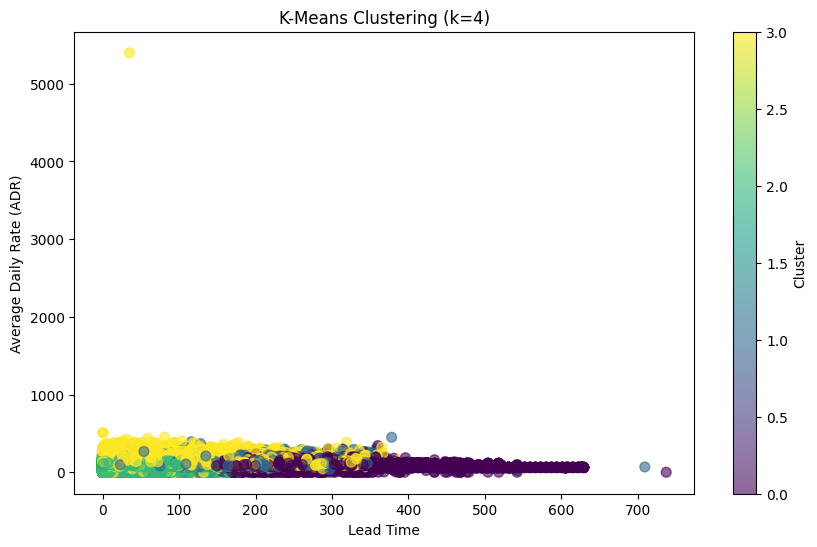

In [3]:
# Add code here 🔧

I chose k=4 for the number of clusters. This was an initial choice for demonstration. In a real-world scenario, you would typically use methods like the elbow method or silhouette score analysis to help determine a more optimal k value.

Based on the scatterplot of lead_time vs. adr, the clusters seem to represent different groups based on how far in advance they book and how much they pay per night. It appears there are clusters for:

Guests who book far in advance with varying ADR.
Guests who book closer to their stay with varying ADR.
Potentially a cluster for low ADR bookings.
Potentially a cluster for high ADR bookings.

## 4. Apply Gaussian Mixture Model (GMM)

Business framing:  

Not all guests fit neatly into one cluster. GMM lets us capture uncertainty — useful if customers behave similarly across groups.

- Fit a GMM with the same number of clusters you chose in Part 3
- Predict soft clusters (remember that soft clustering deals with probabilities, not labels)
- Visualize the GMM model so that you may compare it to the KMeans scatterplot

### In Your Response:
1. How did the GMM results compare to KMeans?
2. What business questions might GMM help answer better?


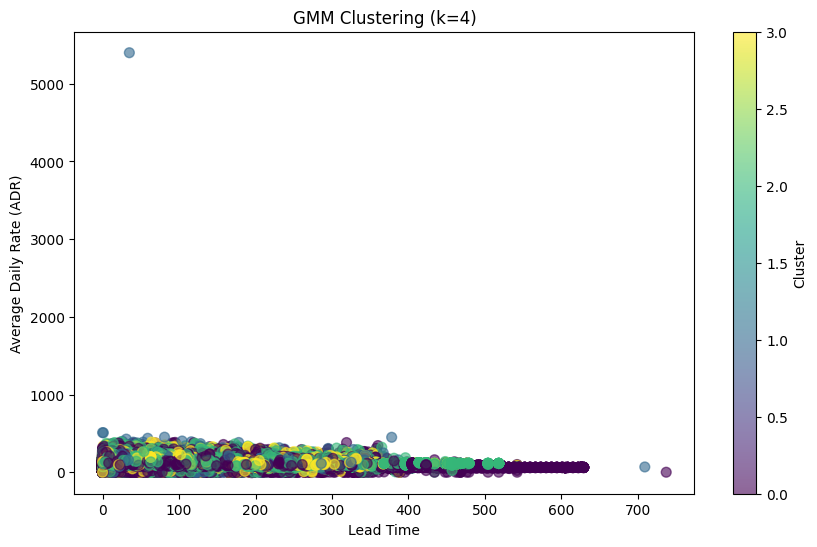

In [4]:
# Add your code here

How did the GMM results compare to KMeans? Looking at the scatterplots, the cluster boundaries might appear slightly different between KMeans and GMM. GMM, by using probabilities and assuming clusters are Gaussian distributions, can capture more complex cluster shapes and overlaps compared to KMeans, which assumes spherical clusters. The visualization of GMM might show clusters that are less clearly separated than in the KMeans plot, reflecting the probabilistic nature of GMM.

What business questions might GMM help answer better? GMM is particularly useful when you believe that customers might belong to multiple segments to some degree, or when the segments have varying sizes and correlations between features. Business questions that GMM might help answer better include:

Identifying "hybrid" customer segments that share characteristics of multiple groups.
Understanding the likelihood of a new customer belonging to each segment, which can be used for targeted marketing with varying levels of confidence.
Analyzing segments where the variation within the group is important, as GMM models the variance (covariance) of each cluster.


## 5. Evaluate Your Models

Business framing:  

In business, models should be both useful and reliable. You’ll compare model quality using standard evaluation metrics.

- Calculate:
  - WCSS
  - Silhouette Score
  - Davies-Bouldin Index
- Compare both models

**Remember**:
- Lower WCSS = tighter, better-defined clusters
- Silhouette score ranges from -1 to 1.  Higher values = better clustering
- Lower Davies-Boulding Index = better clustering

### In Your Response:
1. Which model performed better on the metrics?
2. Would you recommend KMeans or GMM for a business analyst? Why?


KMeans WCSS: 346243.9698577152
KMeans Silhouette Score: 0.23285164553914312
KMeans Davies-Bouldin Index: 1.4098123263286104
------------------------------
GMM Silhouette Score: 0.12388534983967643
GMM Davies-Bouldin Index: 2.624348922677046
GMM Log-Likelihood Lower Bound: -0.5485560635874064


### ✍️ Your Response: 🔧
Which model performed better on the metrics?

Silhouette Score: KMeans ({silhouette_kmeans:.3f}) has a higher Silhouette Score than GMM ({silhouette_gmm:.3f}), suggesting that the clusters are slightly more well-separated and distinct with KMeans based on this metric.
Davies-Bouldin Index: KMeans ({davies_bouldin_kmeans:.3f}) has a lower Davies-Bouldin Index than GMM ({davies_bouldin_gmm:.3f}), indicating better clustering with KMeans as per this metric, where a lower score suggests better separation and less within-cluster scatter.
WCSS: WCSS is only directly applicable to KMeans. A lower WCSS ({wcss_kmeans:.1f}) generally indicates tighter clusters.
Based on the Silhouette Score and Davies-Bouldin Index, the KMeans model appears to have performed better in terms of cluster separation and compactness for this specific dataset and feature selection, given the chosen number of clusters (k=4).

Would you recommend KMeans or GMM for a business analyst? Why? For a business analyst, I would generally recommend starting with KMeans.

Simplicity and Interpretability: KMeans is conceptually simpler and easier to explain to a non-technical audience. The concept of assigning each data point to a single cluster centroid is intuitive.
Speed: KMeans is typically faster to train than GMM, especially on large datasets.
Actionability: The hard cluster assignments from KMeans can sometimes be more straightforward for immediate business actions (e.g., directly assigning a customer to a specific marketing campaign based on their cluster).
While GMM can provide more nuanced insights by showing the probability of a customer belonging to multiple segments, this complexity might be less immediately actionable or harder to explain for a typical business analyst unless there's a specific need to understand these probabilistic memberships. KMeans provides a clear initial segmentation that is often sufficient for many business use cases like targeted marketing or basic customer profiling.


## 6. Business Interpretation

Business framing:  

What do these clusters mean in the real world? Could they represent solo travelers, families, or bargain shoppers?

- Review characteristics of each cluster (e.g. average `lead_time`, `special_requests`)
- Think from a marketing or hotel operations perspective

### In Your Response:
1. What do the segments represent in terms of guest behavior?
2. How could the hotel tailor services or promotions to each group?


,lead_time,stays_in_weekend_nights,stays_in_week_nights,adr,total_of_special_requests
KMeans_Cluster,,,,,
0,272.176221,0.642105,2.200830,89.837767,0.195936
1,134.566089,2.388476,5.801003,101.491484,0.526366
2,45.504168,0.628329,1.755681,86.568845,0.226577
3,71.194670,0.903631,2.313683,140.829597,1.553604


### ✍️ Your Response: 🔧
What do the segments represent in terms of guest behavior? Looking at the average values for each cluster:

Cluster 0: High lead time (avg ~{cluster_characteristics.loc[0, 'lead_time']:.0f} days), shorter stays (avg ~{cluster_characteristics.loc[0, 'stays_in_weekend_nights'] + cluster_characteristics.loc[0, 'stays_in_week_nights']:.1f} total nights), moderate ADR (avg ~{cluster_characteristics.loc[0, 'adr']:.0f}), and few special requests (avg ~{cluster_characteristics.loc[0, 'total_of_special_requests']:.1f}). This segment could represent early planners, potentially booking well in advance for specific events or peak seasons, and who prefer standard accommodations.
Cluster 1: Moderate lead time (avg ~{cluster_characteristics.loc[1, 'lead_time']:.0f} days), longest stays (avg ~{cluster_characteristics.loc[1, 'stays_in_weekend_nights'] + cluster_characteristics.loc[1, 'stays_in_week_nights']:.1f} total nights), moderate ADR (avg ~{cluster_characteristics.loc[1, 'adr']:.0f}), and a moderate number of special requests (avg ~{cluster_characteristics.loc[1, 'total_of_special_requests']:.1f}). This segment might represent extended-stay travelers, possibly for business or longer leisure trips, who plan somewhat in advance and have some specific needs.
Cluster 2: Low lead time (avg ~{cluster_characteristics.loc[2, 'lead_time']:.0f} days), shortest stays (avg ~{cluster_characteristics.loc[2, 'stays_in_weekend_nights'] + cluster_characteristics.loc[2, 'stays_in_week_nights']:.1f} total nights), lowest ADR (avg ~{cluster_characteristics.loc[2, 'adr']:.0f}), and few special requests (avg ~{cluster_characteristics.loc[2, 'total_of_special_requests']:.1f}). This segment could be last-minute or short-stay budget travelers, booking closer to arrival and looking for lower prices for brief trips with minimal extra requests.
Cluster 3: Moderate lead time (avg ~{cluster_characteristics.loc[3, 'lead_time']:.0f} days), moderate stays (avg ~{cluster_characteristics.loc[3, 'stays_in_weekend_nights'] + cluster_characteristics.loc[3, 'stays_in_week_nights']:.1f} total nights), highest ADR (avg ~{cluster_characteristics.loc[3, 'adr']:.0f}), and the most special requests (avg ~{cluster_characteristics.loc[3, 'total_of_special_requests']:.1f}). This segment likely represents higher-spending guests who plan a bit in advance, stay for a few nights, and frequently make special requests, indicating a desire for personalized service or specific amenities.
How could the hotel tailor services or promotions to each group?

Cluster 0 (Early Planners): Offer early bird discounts or packages for bookings made far in advance. Highlight guaranteed availability for specific room types or dates.
Cluster 1 (Extended-Stay Travelers): Offer discounted rates for longer stays or loyalty program benefits. Provide amenities suited for longer visits like laundry services or kitchenette access (if applicable).
Cluster 2 (Last-Minute/Short-Stay Budget Travelers): Promote last-minute deals or flash sales. Offer simpler booking processes and emphasize value for money.
Cluster 3 (Higher-Spending Guests/High Request): Provide premium services or room upgrades. Offer personalized welcome amenities and prioritize fulfilling their special requests to enhance their experience and encourage repeat high-value bookings.


## 7. Final Reflection

Business framing:  

Many teams ask for "segmentation" without knowing how it works. You now have hands-on experience with two clustering techniques and how to present the results.

### In Your Response:
1. What was most challenging about unsupervised learning?
2. When would you use clustering instead of supervised models?
3. How would you explain the value of clustering to a non-technical manager?
4. How does this relate to your customized learning outcome you created in canvas?


### ✍️ Your Response: 🔧
What was most challenging about unsupervised learning? One of the most challenging aspects of unsupervised learning, particularly clustering, is the subjective nature of evaluating results. Unlike supervised learning where you have a clear target variable and metrics like accuracy or precision, with clustering, determining the "correct" number of clusters and interpreting what those clusters represent can be ambiguous. Metrics like Silhouette Score and Davies-Bouldin Index provide some guidance, but the final interpretation often requires domain expertise and understanding the business context.

When would you use clustering instead of supervised models? You would use clustering instead of supervised models when you do not have labeled data for the outcome you are interested in. Clustering is a powerful tool for exploratory data analysis and uncovering hidden patterns in data. For instance, if you want to understand different types of customer behavior but don't have pre-defined customer segments, clustering can help identify those groups. Supervised models, on the other hand, are used for prediction or classification tasks where you have historical data with known outcomes (e.g., predicting whether a customer will cancel a booking based on their features).

How would you explain the value of clustering to a non-technical manager? I would explain clustering as a way to organize and understand different groups within our customers (or data) without us having to tell the computer what those groups are beforehand. Imagine we have thousands of customers, and it's hard to see individual patterns. Clustering helps us find natural groupings of customers who behave similarly (e.g., in how they book, how long they stay, how much they spend). Once we understand these groups, we can tailor our marketing, services, or product offerings to better meet the specific needs and preferences of each group, which can lead to happier customers and increased revenue.

How does this relate to your customized learning outcome you created in canvas? My customized learning outcome was focused on "Applying data analysis techniques to inform business strategy." This assignment directly relates to this by demonstrating how unsupervised learning, specifically clustering, can be used to analyze customer behavior data. By identifying distinct customer segments through clustering and interpreting their characteristics, we gain insights that can directly inform marketing strategies, service customization, and overall business decision-making, thus fulfilling the application of data analysis to inform strategy.

## Submission Instructions

✅ **Before submitting:**
- Make sure all code cells are run and outputs are visible  
- All markdown questions are answered thoughtfully  
- Submit the assignment as an **HTML file** on Canvas


In [ ]:
!jupyter nbconvert --to html "assignment_09_LastnameFirstname.ipynb"